In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns

In [2]:
# Z BAZY DANYCH ZOSTAŁ WYRZUCONY 1993 R.

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\48500\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','natlty1_txt']]

In [5]:
df2

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,natlty1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,Dominican Republic
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,Belgium
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,United States
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,United States
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,United States
...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Firearms,1.0,Somalia
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Explosives,2.0,Russia
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,Philippines
181689,2017,12,31,India,South Asia,Imphal,Bombing/Explosion,Government (General),Explosives,0.0,India


In [6]:
df2.region_txt.drop_duplicates()

0        Central America & Caribbean
1                      North America
2                     Southeast Asia
3                     Western Europe
4                          East Asia
6                      South America
15                    Eastern Europe
16                Sub-Saharan Africa
95        Middle East & North Africa
565            Australasia & Oceania
585                       South Asia
47639                   Central Asia
Name: region_txt, dtype: object

In [7]:
df2.region_txt.describe()

count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: region_txt, dtype: object

In [8]:
reg = df2.groupby(df2.region_txt)['region_txt'].count()
print(reg)

region_txt
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: region_txt, dtype: int64


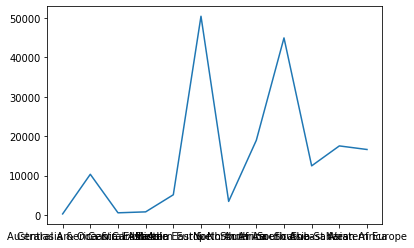

In [9]:
# wykres ilości wystapień ataków terrorystycznych w poszczególnych regionach
# jak zmienić nazwy regionów na pion?
plt.plot(reg)

In [10]:
df2.nkill.where(df2.region_txt == 'Middle East & North Africa').describe()

count    48201.000000
mean         2.855584
std         13.241784
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1570.000000
Name: nkill, dtype: float64

In [11]:
df2.nkill.where(df2.region_txt == 'Australasia & Oceania').describe()

count    276.000000
mean       0.543478
std        1.945137
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       17.000000
Name: nkill, dtype: float64

In [12]:
# podstawowe informacje statystyczne o ofiarach w poszczególnych regionach
x = df2[['nkill', 'region_txt']].groupby(df2.region_txt).describe()
x

nkill                                           \
                               count      mean        std  min  25%  50%  75%   
region_txt                                                                      
Australasia & Oceania          276.0  0.543478   1.945137  0.0  0.0  0.0  0.0   
Central America & Caribbean   8022.0  3.578659  11.629926  0.0  0.0  0.0  2.0   
Central Asia                   559.0  1.788909   4.664572  0.0  0.0  1.0  2.0   
East Asia                      763.0  1.509830   8.278191  0.0  0.0  0.0  0.0   
Eastern Europe                4978.0  1.489554   9.514495  0.0  0.0  0.0  1.0   
Middle East & North Africa   48201.0  2.855584  13.241784  0.0  0.0  1.0  2.0   
North America                 3363.0  1.461790  34.553005  0.0  0.0  0.0  0.0   
South America                17306.0  1.666994   5.455533  0.0  0.0  0.0  1.0   
South Asia                   44037.0  2.300770   7.103828  0.0  0.0  1.0  2.0   
Southeast Asia               12209.0  1.280776   3.960605  0.0  0.0  0.0  1.0   
Sub-Saharan Africa           15937.0  4.918492  18.550876  0.0  0.0  1.0  4.0   
Western Europe               15727.0  0.425637   3.073362  0.0  0.0  0.0  0.0   

                                     
                                max  
region_txt                           
Australasia & Oceania          17.0  
Central America & Caribbean   300.0  
Central Asia                   50.0  
East Asia                     184.0  
Eastern Europe                344.0  
Middle East & North Africa   1570.0  
North America                1384.0  
South America                 275.0  
South Asia                    518.0  
Southeast Asia                116.0  
Sub-Saharan Africa           1180.0  
Western Europe                270.0

In [13]:
# najpopularniejsze typy ataków i ich naczęstrze występowanie (region)
y = df2[['region_txt']].groupby(df2.attacktype1_txt).describe()
y

region_txt         \
                                         count unique   
attacktype1_txt                                         
Armed Assault                            42669     12   
Assassination                            19312     12   
Bombing/Explosion                        88255     12   
Facility/Infrastructure Attack           10356     12   
Hijacking                                  659     12   
Hostage Taking (Barricade Incident)        991     12   
Hostage Taking (Kidnapping)              11158     12   
Unarmed Assault                           1015     12   
Unknown                                   7276     12   

                                                                        
                                                            top   freq  
attacktype1_txt                                                         
Armed Assault                                        South Asia  11404  
Assassination                                        South Asia   4301  
Bombing/Explosion                    Middle East & North Africa  30908  
Facility/Infrastructure Attack                   Western Europe   2631  
Hijacking                            Middle East & North Africa    138  
Hostage Taking (Barricade Incident)               South America    234  
Hostage Taking (Kidnapping)                          South Asia   3277  
Unarmed Assault                                      South Asia    323  
Unknown                                              South Asia   2021